In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as scs
%matplotlib inline
plt.style.use('ggplot')
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [5]:
data_ = pd.read_csv('data/data_nobadrows.csv')
data_ = data_[[col for col in data_.columns if col[:7]  != "Unnamed"]]
data_.columns = [col.lower().strip() for col in data_.columns]

FileNotFoundError: File b'/Users/michaerl/Users/michaerl/Downloads/smu_data_mining1-mast/data/data_nobadrows.csv' does not exist

In [60]:
val_counts = data_['id'].value_counts()

In [61]:
dup_ids = set(val_counts[val_counts.apply(lambda x: True if x == 2 else False)].index)

In [6]:
data_duped = data_[data_['id'].isin(dup_ids)]
data_unduped = data_[~data_['id'].isin(dup_ids)]
data = pd.concat([data_unduped, data_duped[::2]])
data.shape

NameError: name 'data_' is not defined

### Buisness Understanding 10	
>* Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

* We selected this dataset because it seemed to be a faily robust one we could find on Kaggle.  That's mostly it.  I hope to have more to say here later, but there isn't really a buisness case for this, finding datasets is hard

### Data Meaning Type 	10	
> * Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

In [7]:
data.info()

NameError: name 'data' is not defined

In [67]:
data.sample(3).T

,411619,548893,93934
id,1449934329,217570509,1559100115
backers,1,0,32
category,Film & Video,Film & Video,R&B
country,US,US,US
currency,USD,USD,USD
dataset,2018,2018,2016
deadline,2013-09-07,2013-04-25,2014-09-19 19:32:51
goal,5000,5099,2000
launched,2013-07-24 22:49:28,2013-03-26 01:53:59,2014-08-20 19:32:51
main_category,Film & Video,Film & Video,Music


In [66]:
data['state'].value_counts(1)

failed        0.517180
successful    0.353187
canceled      0.102612
live          0.012967
undefined     0.009262
suspended     0.004793
Name: state, dtype: float64

* The dataset consists of 378661 observations.  These observations are all individual kickstarters which occured over the past few years.  The included features in this dataset are as follows:
>* ID: int 
>>- a unique identifer for each kickstarter project
>* Backers: int 
>>- number of people who backed the kickstarter program
>* Category: str
>>- product catagory which the Kickstarter falls into (set of 159)
>* Country: str
>>- Country of origin for the Kickstarter campaign
>* Currency: str
>>- Type of money used in goal and pledged
>* dataset: int {2018 | 2016}
>>- which dataset the kickstarter came from (either 2018 or 2016)
>* goal: float
>>- amount of money the kickstarter was looking for (in native currency)
>* launched: timestamp:
>>- time when the kickstarter was launched
>* main_category (int)
>>- Set of 15 diffirent larger catagories (similar to catagory)
>* Name: str
>>- Name of the kickstarter project
>* Pledged: float
>>- Value pledged to Kickstarter in native currency
>* State: str {failed, successful, canceled, live, undefined, suspended}
>>- Condition of Kickstarter at time of survey
>* USD Pledged: float
>>- value pledged in USD
>* USD_pledged_real: float
>>- This is an attempt to measure the atcaul USD based on currency values at the time by the creator of the dataset

### Data Quality	15	
> * Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [2]:
#data_16 = pd.read_csv('data/ks-projects-201612.csv')
#data_16.columns = [col.lower().strip() for col in f_data.columns]

data_18 = pd.read_csv('data/ks-projects-201801.csv')
data_18.columns = [col.lower().strip() for col in data_18.columns]

In [9]:
data_16.sample(4).T

NameError: name 'data_16' is not defined

In [10]:
data_16.info()

NameError: name 'data_16' is not defined

In [3]:
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
id                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


#### There are several datapoints which are missing a significent amount of data in this dataset

The Unnamed columns (13-16) are artifact data due to commas in the pledged amount or Name field,  This could have been solved by using a .tsv or some other means of deliminating the data

* Evidence of this is shown below, where 6 values are taken from "unnamed: 14" (where it is not null) and each of those values contains 2 commas in the name field.

In [4]:
iiter = data_16[data_16['unnamed: 14'].apply(lambda x: type(x) is str)]\
            .sample(6)[['name', 'category', 'main_category']].values
for x in iiter:
    print ','.join(i for i in x)

SyntaxError: invalid syntax (<ipython-input-4-3cf519023a03>, line 3)

Additionally, the Creator of the dataset attempted to time adjust the values for USD pledged in the 2018 dataset, but this was not completed for the 2016 dataset.
* because of this, and the complexity associated with fixing datapoints which contain columns in them, we will be sticking to the 2018 dataset for the remainder of this analysis

In [184]:
ids_2016 = data_16['id'].values

In [5]:
"{:.1f}%".format(float(data_18.set_index('id').loc[ids_2016].shape[0])\
                                / data_16.shape[0] * 100)

NameError: name 'ids_2016' is not defined

* This generalization appears to be valid, because the 2018 dataset contains all of the values from the 2016 dataset as well

There are 4 datapoints which are missing names.  Since this is only 4 datapoints out of 378661, we will assign these datapoint a randomly generated number as a name

In [6]:
data_18[~data_18['name'].apply(lambda x: type(x) is str)].iloc[:,:7]

,id,name,category,main_category,currency,deadline,goal
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0


In [7]:
rand_vars = np.random.randint(30000, 500000, size=4)
print(rand_vars)

[383024 431031 430900 295048]


In [8]:
noname = data_18[~data_18['name'].apply(lambda x: type(x) is str)].index

data_18.loc[noname , 'name'] = \
    pd.Series(np.random.choice(rand_vars, 4, replace=False)).astype(str)

additionaly, the 2018 dataset has 3797 values where the usd pledged value is null.  For our purposes, we will drop this column and use the usd_pledged_real column to identify if our project has met it's goal

For the sake of keeping everything uniform, we will keep all monetary values in USD for the remainder of this report, so they can be directly compared

In [9]:
data_18[np.isnan(data_18['usd pledged'])].shape

(3797, 15)

In [41]:
excl = {'usd pledged', 'goal', 'pledged'}
df = data_18[[col for col in data_18.columns if col not in excl]]

### * Simple Statistics	10	
> * Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

* Removing redundant and null values has left us with only 3 continous features in the dataset.  ID is also included below, but this value is 

In [11]:
df.describe()

,id,backers,usd_pledged_real,usd_goal_real
count,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05
mean,1.074731e+09,105.617476,9.058924e+03,4.545440e+04
std,6.190862e+08,907.185035,9.097334e+04,1.152950e+06
min,5.971000e+03,0.000000,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000,3.100000e+01,2.000000e+03
50%,1.075276e+09,12.000000,6.243300e+02,5.500000e+03
75%,1.610149e+09,56.000000,4.050000e+03,1.550000e+04
max,2.147476e+09,219382.000000,2.033899e+07,1.663614e+08


#### Backers
first we will look at how backers are distributed

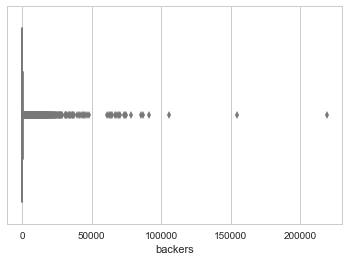

In [12]:
sns.boxplot(df['backers']);

* and a violen plot of the log distribution so we can get a better view of what's going on

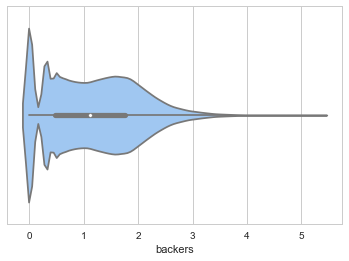

In [13]:
sns.violinplot(np.log10(df['backers'] + 1));

* without using a log distribution of backers, is it clear that a small percent of the Kickstartr campaigns get a large portion of the data.  It is fair to say this feature is non-baysiasn, and it appears to more closley follow a power law distribution.

* further evidence of this can be found in that nearly 50% of all Backers contributed to the top 1% of all kickstarter campaigns

In [14]:
bkrs = df['backers']
_50 = float(bkrs[bkrs >= bkrs.quantile(.50)].sum()) / bkrs.sum() * 100
_75 = float(bkrs[bkrs >= bkrs.quantile(.75)].sum()) / bkrs.sum() * 100
_90 = float(bkrs[bkrs >= bkrs.quantile(.90)].sum()) / bkrs.sum() * 100
_99 = float(bkrs[bkrs >= bkrs.quantile(.99)].sum()) / bkrs.sum() * 100
_999 = float(bkrs[bkrs >= bkrs.quantile(.999)].sum()) / bkrs.sum() * 100

tmplt = '{:.2f}% of the total number of backers go to the top {}% of kickstarters'

print(tmplt.format(_50, '50'))
print(tmplt.format(_75, '25'))
print(tmplt.format(_90, '10'))
print(tmplt.format(_99, '1'))
print(tmplt.format(_999, '0.1'))

98.69% of the total number of backers go to the top 50% of kickstarters
91.84% of the total number of backers go to the top 25% of kickstarters
78.22% of the total number of backers go to the top 10% of kickstarters
42.35% of the total number of backers go to the top 1% of kickstarters
17.22% of the total number of backers go to the top 0.1% of kickstarters


#### usd_pledged_real

* looking at the amount of money pledged, it shows a similar relationship to the number of backers; except it does have significent representation in the 400 USD to 800 USD range

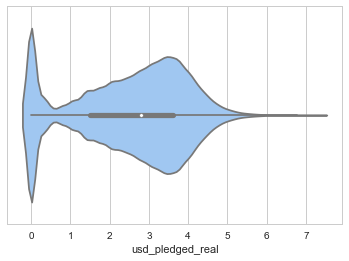

In [15]:
sns.violinplot(np.log10(df['usd_pledged_real'] + 1));

In [16]:
bkrs = df['usd_pledged_real']
_50 = float(bkrs[bkrs >= bkrs.quantile(.50)].sum()) / bkrs.sum() * 100
_75 = float(bkrs[bkrs >= bkrs.quantile(.75)].sum()) / bkrs.sum() * 100
_90 = float(bkrs[bkrs >= bkrs.quantile(.90)].sum()) / bkrs.sum() * 100
_99 = float(bkrs[bkrs >= bkrs.quantile(.99)].sum()) / bkrs.sum() * 100
_999 = float(bkrs[bkrs >= bkrs.quantile(.999)].sum()) / bkrs.sum() * 100

tmplt = '{:.2f}% of the quantity of funding go to the top {}% of kickstarters'

print(tmplt.format(_50, '50'))
print(tmplt.format(_75, '25'))
print(tmplt.format(_90, '10'))
print(tmplt.format(_99, '1'))
print(tmplt.format(_999, '0.1'))

99.36% of the quantity of funding go to the top 50% of kickstarters
94.09% of the quantity of funding go to the top 25% of kickstarters
81.61% of the quantity of funding go to the top 10% of kickstarters
47.13% of the quantity of funding go to the top 1% of kickstarters
21.10% of the quantity of funding go to the top 0.1% of kickstarters


#### usd_goal_real

In [17]:
df.loc[:,'log_goal'] = np.log10(df.loc[:,'usd_goal_real'] + 1)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


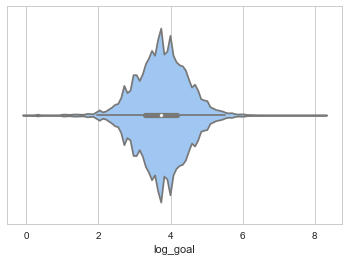

In [18]:
sns.violinplot(df['log_goal']);

* Taking the log of the goal (because there are still quite a few kickstarters with very high and very low goals), we find that the log of the goal appears to be very close to normally distributed.  It's possible that if we only focus on Kickstarts with goals between 50 USD and 100,000 USD, and ignore fringe kickstarters, we may be able to get a better understanding of how most kickstarters work

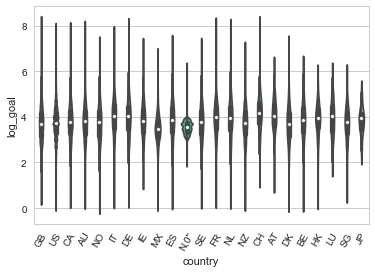

In [19]:
plt.xticks(rotation=60)
vplot= sns.violinplot(x="country", y="log_goal", data=df, figsize=(18, 6))

### Visualize Attributes	(15)	
> * Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

In [58]:
dfcopy = df.assign(success=0)
dfcopy.loc[ dfcopy['state']=="successful", 'success' ] = 1

dfcopy = dfcopy.assign(isUS=0)
dfcopy.loc[ dfcopy['country']=="US", 'isUS' ] = 1


### Explore Joint Attributes	(15)
> * Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114f419b0>,
      dtype=object)

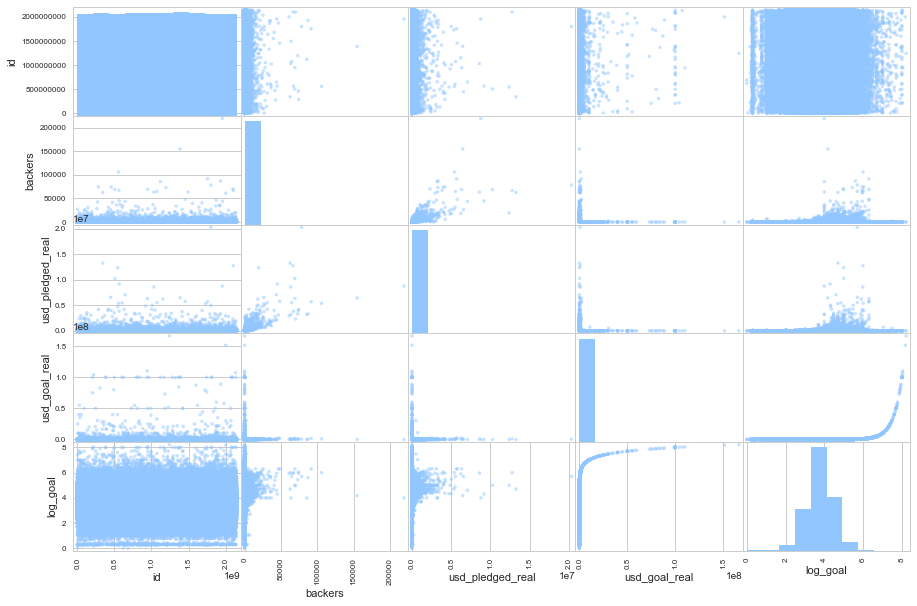

In [21]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df,figsize=(15, 10))

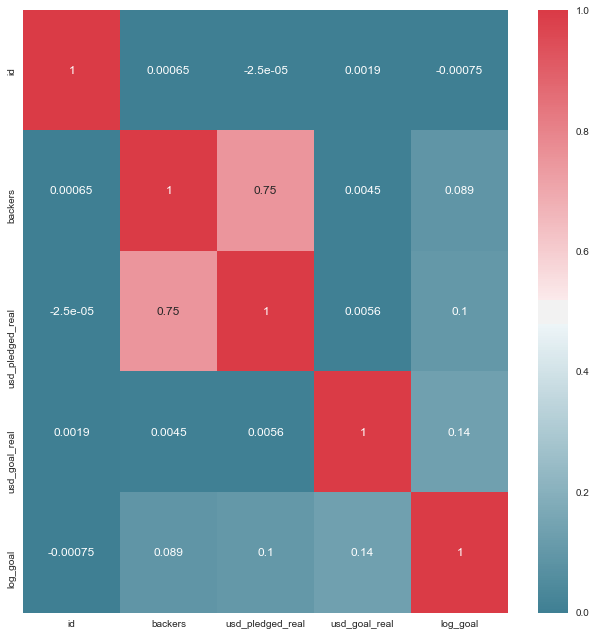

In [27]:
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()

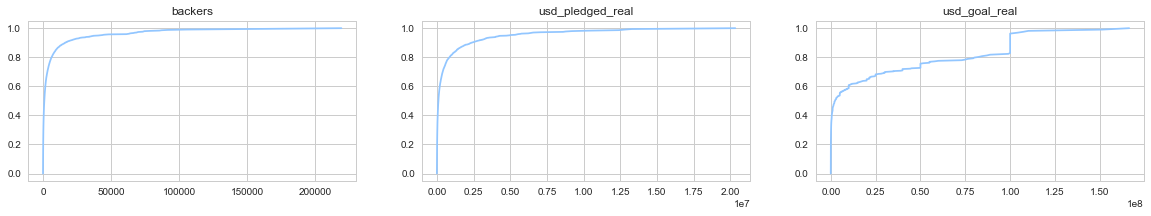

In [23]:
plt.figure(figsize=(20,10))
for fi,feature in enumerate(['backers','usd_pledged_real','usd_goal_real']):
    plt.subplot(3,3,fi+1)
    x_ax = np.sort(df[feature])
    y_ax = np.cumsum(x_ax)
    y_ax = y_ax/np.max(y_ax)
    plt.plot(x_ax,y_ax)
    plt.title(feature)
    
plt.show()

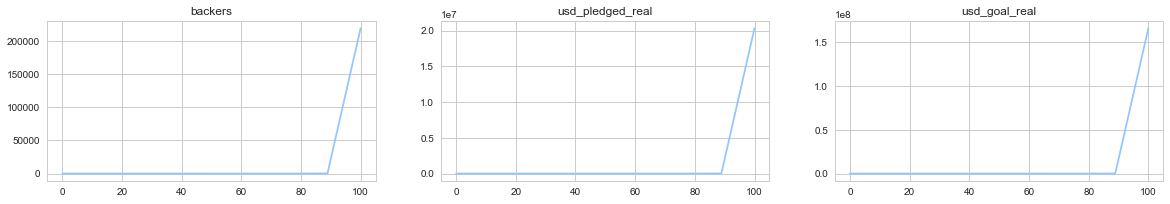

In [25]:
plt.figure(figsize=(20,10))
for fi,feature in enumerate(['backers','usd_pledged_real','usd_goal_real']):
    plt.subplot(3,3,fi+1)
    x_ax = np.linspace(0,100,10)
    y_ax = [np.percentile(df[feature], x_val) for x_val in x_ax]
    plt.plot(x_ax,y_ax)
    plt.title(feature)
    
plt.show()

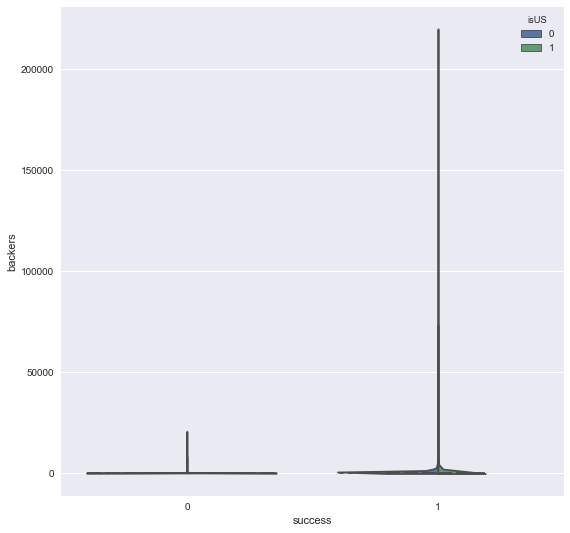

In [60]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="success", y="backers", hue="isUS", data=dfcopy, 
               split=True, inner="quart")

### Explore Attributes and Class	10	
> * Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

### New Features	5	
>* Are there other features that could be added to the data or created from existing features? Which ones?

### Exceptional Work	10	
>* You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

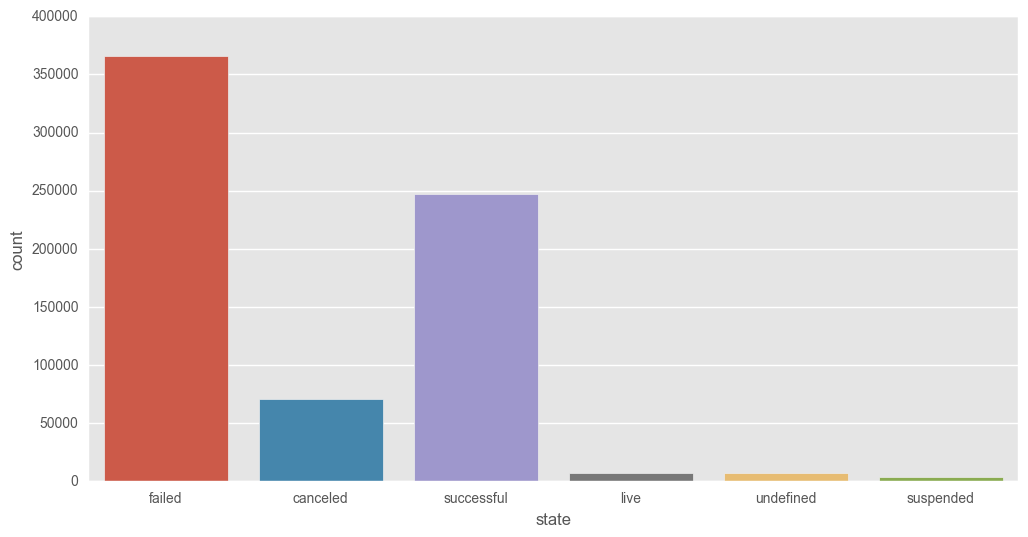

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='state', data=data)

<function matplotlib.pyplot.tight_layout>

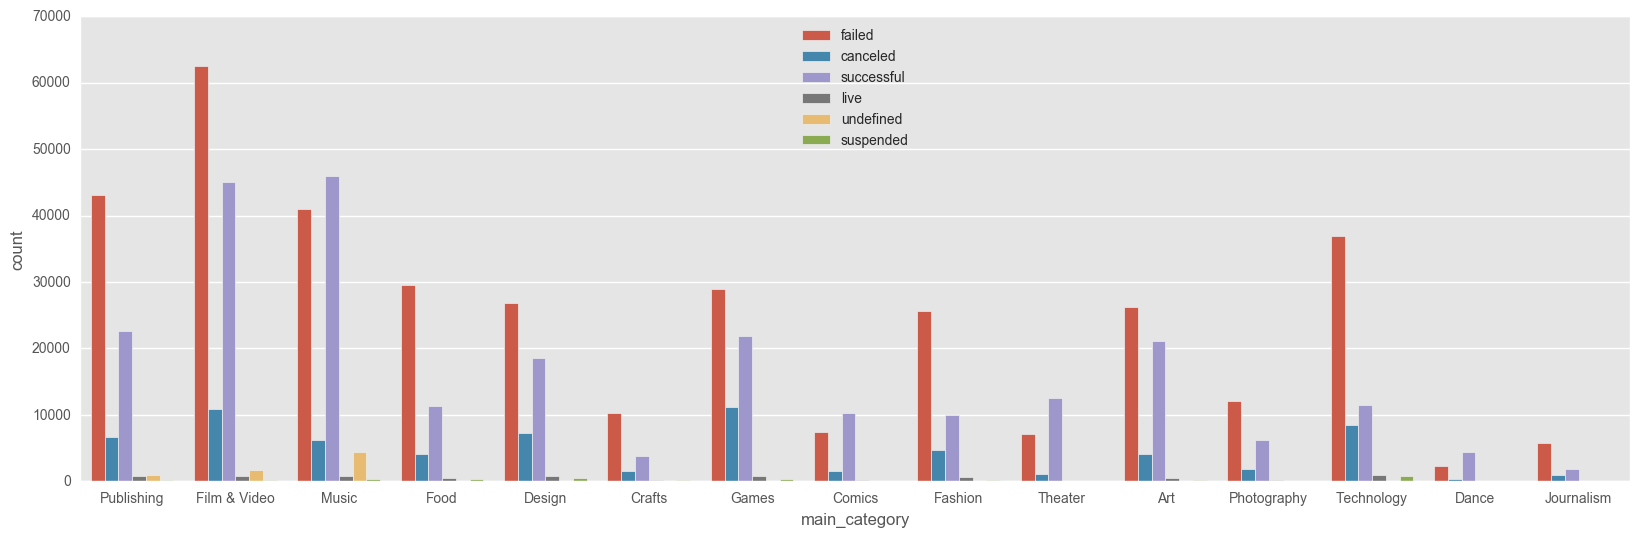

In [16]:
plt.figure(figsize=(20,6))
sns.countplot(x='main_category', data=data, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

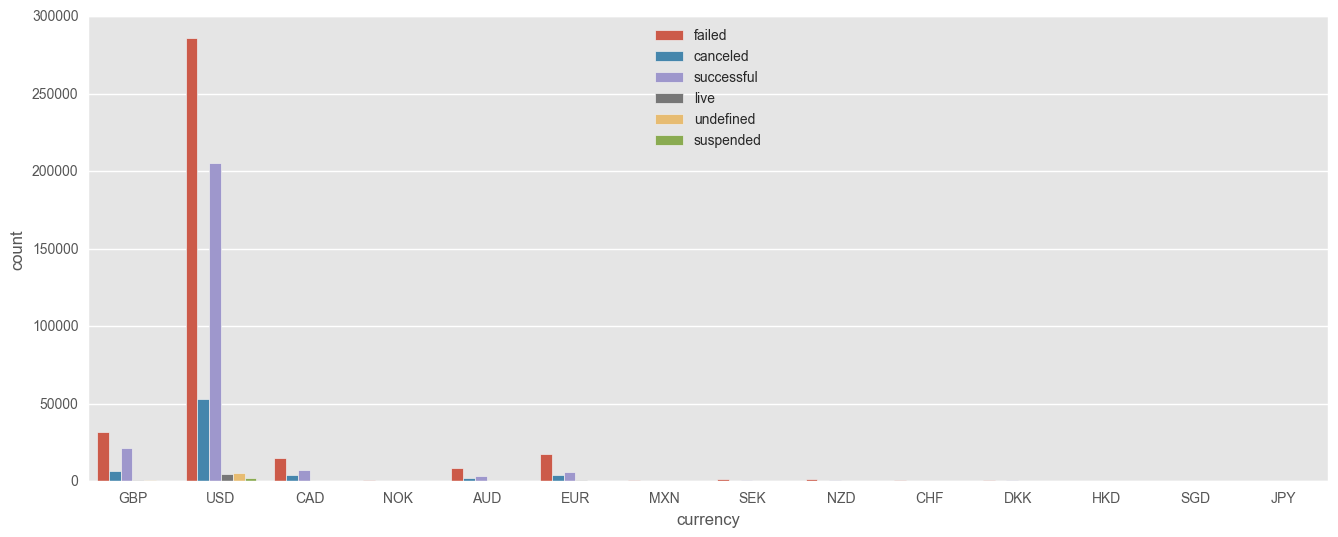

In [17]:
plt.figure(figsize=(16,6))
sns.countplot(x='currency', data=data, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

In [19]:
data['deadline'].apply(pd.Timestamp).min()

Timestamp('2009-05-03 00:00:00')